# <font style="color:rgb(50,120,229)">Deep Learning based Image Classification</font>
Earlier, we learned how to use HoG and SVM to train an image classifier to identify the object present in an image. In this chapter, we will discuss how to use Deep Learning based image recognition models present in OpenCV. These models are trained for ILSVRC.

## <font style="color:rgb(50,120,229)">1. What is ImageNet and ILSVRC?</font>
ImageNet is a project which aims to provide a large image database for research purposes. It contains more than 14 million images which belong to more than 20,000 classes ( or synsets ). They also provide bounding box annotations for around 1 million images, which can be used in Object Localization tasks. It should be noted that they only provide urls of images and you need to download those images.

ImageNet Large Scale Visual Recognition Challenge ( ILSVRC ) is an annual competition organized by the ImageNet team since 2010, where research teams evaluate their computer vision algorithms on various visual recognition tasks such as Object Classification and Object Localization. The training data is a subset of ImageNet with 1.2 million images belonging to 1000 classes. 

Deep Learning came to limelight in 2012 when Alex Krizhevsky and his team won the competition by a margin of a whooping 11%. Since then, Object Recognition has substantially improved and has reached human level accuracy in recent years. 

The authors of these state-of-the-art networks have been kind enough to share the trained models. Most researchers have followed this trend and now it is very easy to find state-of-the-art models open-sourced to the community.

Deep Learning is not the focus of this course. We will learn about it in great detail in our course **Deep Learning with PyTorch**. In this notebook, we will simply learn how to use some very well known deep learning models available in OpenCV. We will see how to use the model from two different frameworks, namely - Caffe and Tensorflow.

## <font style="color:rgb(50,120,229)">2. OpenCV DNN Module</font>
Using the DNN module in OpenCV comprises of the following steps : 
1. Load the network in memory using `readNet` function.
2. Convert input image to blob using `blobFromImage` function
3. Set the blob as the input of network.
4. Make a `forward` pass and get the network output.
5. Process the output

Let us see the major functions and their arguments in more detail.
### <font style="color:rgb(8,133,37)">2.1. Loading the Network</font>
The network is loaded into memory using different functions for different frameworks. For example, `readNetFromTensorflow()` for Tensorflow models, `readNetFromCaffe()` for caffe models and so on. From OpenCV > 3.4.1, there is another function `readNet()`, which figures out the framework from its arguments and loads the network. 

#### <font style = "color:rgb(8,133,37)">Tensorflow</font>
```python
retval	=	cv.dnn.readNetFromTensorflow(	model[, config]	)
```

- `model` is the file which contains the weights of the network. 
- `Config` is the file which defines the network.

#### <font style = "color:rgb(8,133,37)">Caffe </font>

```python
retval	=	cv.dnn.readNetFromCaffe( prototxt, model)
```

- `model` is the file which contains the weights of the network. 
- `prototxt` is the file which defines the network.


**Note** that the model and config is in opposite order for Caffe and Tensorflow.

### <font style="color:rgb(8,133,37)">2.2. Convert image to blob</font>
```python
retval	=	cv.dnn.blobFromImage(	image[, scalefactor[, size[, mean[, swapRB[, crop]]]]]	)
```
Creates 4-dimensional blob from image. Optionally resizes and crops image from center, subtract mean values, scales values by scalefactor, swap Blue and Red channels

**Parameters**
* `image` : input image (with 1-, 3- or 4-channels).
* `size` : spatial size for output image
* `mean` : scalar with mean values which are subtracted from channels. Values are intended to be in (mean-R, mean-G, mean-B) order if image has BGR ordering and swapRB is true.
* `scalefactor` : multiplier for image values.
* `swapRB` : flag which indicates that swap first and last channels in 3-channel image is necessary.
* `crop` : flag which indicates whether image will be cropped after resize or not

If crop is true, input image is resized so one side after resize is equal to corresponding dimension in size and another one is equal or larger. Then, crop from the center is performed. 

If crop is false, direct resize without cropping and preserving aspect ratio is performed.

### <font style="color:rgb(8,133,37)">2.3. Generate output</font>
```python
outputBlobs	=	net.forward(	[, outputBlobs[, outputName]])
```

The function runs a forward pass to compute the output of the layer with name *outputName*.

**Parameters**
* `outputBlobs`	: contains all output blobs for specified layer.
* `outputName` : name for layer which output is needed to get


Let us see if the models recognize a Panda.

## <font style="color:rgb(50,120,229)">3. Using Caffe models</font>
In this section, we will see how to use the googlenet network trained on Caffe. 
### <font style="color:rgb(8,133,37)">Steps</font>

1. First, the network and image are loaded. The image is converted to the blob and then a forward pass is executed. 
2. The output matrix consists of numbers belonging to each class indicating the confidence score whether the class is present in the image or not. 
3. The argmax is found from this matrix which gives the most confident prediction. 
4. The output label is obtained from the output class and class file named `classification_classes_ILSVRC2012.txt`. 

            

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
DATA_PATH = './data/'
MODEL_PATH = './models/'
%matplotlib inline

In [3]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0,8.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [4]:
filename = DATA_PATH + "images/panda.jpg"

(426, 640, 3)
(1, 3, 224, 224)


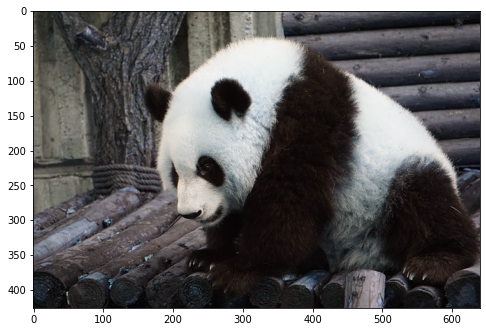

Class ID : 388
Predicted Class = giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca, 
Confidence = 1.000


In [10]:
protoFile = MODEL_PATH + "bvlc_googlenet.prototxt"
weightFile = MODEL_PATH + "bvlc_googlenet.caffemodel"

frame = cv2.imread(filename)
print(frame.shape)

classFile = MODEL_PATH + "classification_classes_ILSVRC2012.txt"

classes = None
with open(classFile, 'rt') as f:
    classes = f.read().rstrip('\n').split('\n')

inHeight = 224
inWidth = 224
swap_rgb = False
mean = [104, 117, 123]
scale = 1.0

# Load a network
net = cv2.dnn.readNetFromCaffe(protoFile, weightFile)

# Create a 4D blob from a frame.
blob = cv2.dnn.blobFromImage(frame, scale, (inWidth, inHeight), mean, 
        swap_rgb, crop=False)

print(blob.shape)

# Run a model
net.setInput(blob)
out = net.forward()

# Get a class with a highest score.
out = out.flatten()
classId = np.argmax(out)

className = classes[classId]
confidence = out[classId]
label = "Predicted Class = {}, \nConfidence = {:.3f}".format(className, confidence)

plt.imshow(frame)
plt.show()
print("Class ID : {}".format(classId))
print(label)

## <font style="color:rgb(50,120,229)">4. Using Tensorflow models</font>
In this section, we will see how to use the googlenet network trained in Tensorflow.
### <font style="color:rgb(8,133,37)">Caffe vs Tensorflow</font>
The major differences from the previous code is given below : 
1. The blobFromImage functions will use True for swapRB flag. This is because Tensorflow uses RGB format whereas Caffe and OpenCV use BGR format.
2. The class file and mapping between classes and labels is different for Tensorflow. Thus, we use a different file named `imagenet_comp_graph_label_strings.txt`.
3. The mean is also different.
4. There is no config file. Only the frozen graph is used and it has all the information required for making predictions.

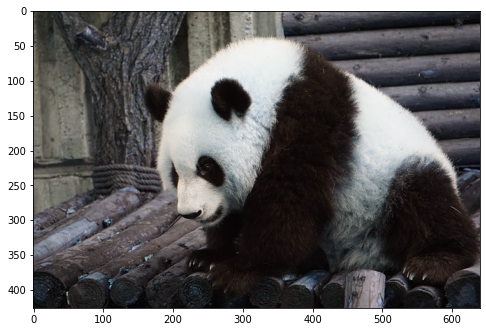

Class ID : 169
Predicted Class = giant panda, 
Confidence = 1.000


In [6]:
import cv2
import numpy as np

weightFile = MODEL_PATH + "tensorflow_inception_graph.pb"

frame = cv2.imread(filename)

classFile = MODEL_PATH + "imagenet_comp_graph_label_strings.txt"

classes = None
with open(classFile, 'rt') as f:
    classes = f.read().rstrip('\n').split('\n')

inHeight = 224
inWidth = 224
swap_rgb = True
mean = [117, 117, 117]
scale = 1.0

# Load a network
net = cv2.dnn.readNetFromTensorflow(weightFile)
# Create a 4D blob from a frame.
blob = cv2.dnn.blobFromImage(frame, scale, (inWidth, inHeight), 
                              mean, swap_rgb, crop=False)

# Run a model
net.setInput(blob)
out = net.forward()

# Get a class with a highest score.
out = out.flatten()
classId = np.argmax(out)

className = classes[classId]
confidence = out[classId]

label = "Predicted Class = {}, \nConfidence = {:.3f}".format(className, confidence)

plt.imshow(frame)
plt.show()
print("Class ID : {}".format(classId))
print(label)

## <font style="color:rgb(50,120,229)">References and Further Reading</font>
https://docs.opencv.org/3.4.3/d6/d0f/group__dnn.html

https://docs.opencv.org/3.4.2/db/d30/classcv_1_1dnn_1_1Net.html

https://github.com/opencv/opencv/tree/master/samples/dnn